## In this notebook, I will describe how the model behave with Titanic data.

## 1. Preprocessing data

In [1]:
import matplotlib
from matplotlib import font_manager

font_manager.fontManager.addfont("C:/Users/tomoyuki.kawashita/AppData/Roaming/Python/Python38/site-packages/matplotlib/fonts/ipag.ttf")
matplotlib.rc('font', family="IPAGothic")

import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

train.head()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
alldata = pd.concat([train, test],axis=0)

In [3]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'
    
def replace_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [4]:
alldata['Title'] = alldata['Name'].map(lambda x: get_title(x))
alldata['Title'] = alldata.apply(replace_titles, axis=1)

In [5]:
alldata=alldata.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
alldata=pd.get_dummies(alldata, drop_first=True) #To avoid Multicollinearity, add drop_first=True
alldata.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,1,0,1,0,0,1,0
1,1.0,1,38.0,1,0,71.2833,0,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,0,0,1,0,1,0,0
3,1.0,1,35.0,1,0,53.1000,0,0,1,0,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,0,1,0,0,1,0


In [6]:
alldata['Age'] = alldata['Age'].fillna(np.nanmean(alldata['Age']))
alldata['Fare'] = alldata['Fare'].fillna(np.nanmean(alldata['Fare']))

In [7]:
train = alldata.iloc[:train.shape[0],:]
test = alldata.iloc[train.shape[0]:,:]

In [8]:
target_col = "Survived"
exc_cols = ["Survived","Sex_male"]
feature_col = [col for col in alldata.columns if col not in exc_cols]

In [9]:
X_train = train[feature_col]
y_train = train[target_col]
X_test = test[feature_col]

In [10]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.33,random_state=1)

## 2. Create 
Model and check correlation


### 2.1. Create RandomForest Model

In [11]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(random_state=0) #For fixing seed, set random_state

RFR.fit(X_train1,y_train1)

RandomForestRegressor(random_state=0)

Breafly see the Feature Importances

Text(0.5, 1.0, 'Feature importances')

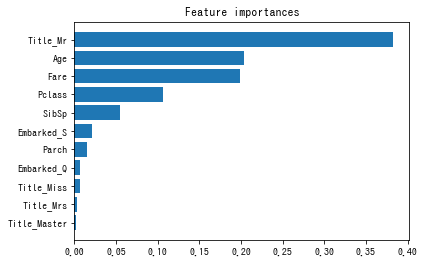

In [12]:
sorted_idx =RFR.feature_importances_.argsort()

plt.barh(X_train1.columns[sorted_idx],RFR.feature_importances_[sorted_idx])
plt.title("Feature importances")

### 2.2. Heatmap of Correlation
Next figure shows the Correlation between features by heatmap. 

Text(0.5, 1.0, 'Heatmap\xa0of all the Features')

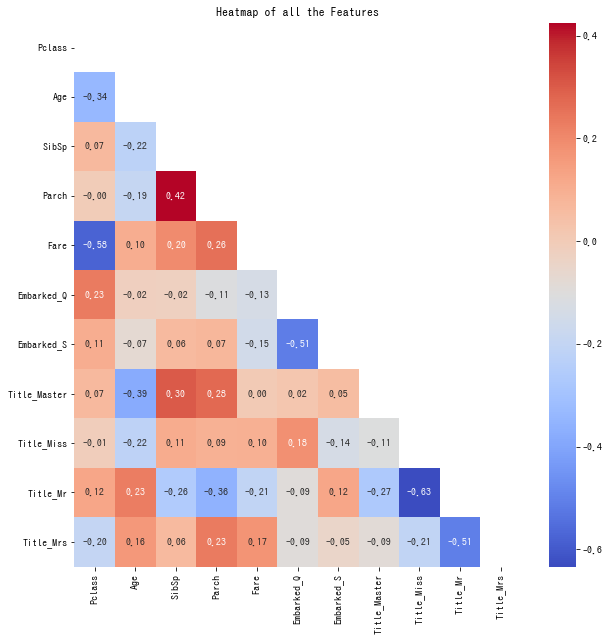

In [13]:
import seaborn as sns
plt.subplots(figsize=(10,10))
matrix = np.triu(X_train1.corr())
sns.heatmap(X_train1.corr(), annot=True, mask=matrix, cmap='coolwarm',fmt='.2f')
plt.title("Heatmap of all the Features")

## 3. Interprit Model by Permutation Feature Importance

In [14]:
from sklearn.inspection import permutation_importance

pfi = permutation_importance(
    estimator=RFR,
    X=X_test1,
    y=y_test1,
    scoring="neg_root_mean_squared_error",
    n_repeats=5,  # Number of Shuffles
    n_jobs=-1,
    random_state=42,
)

pfi

{'importances_mean': array([ 7.00894572e-02,  1.19117303e-02,  5.78481057e-04, -1.33261542e-04,
         3.04558779e-03,  4.46631542e-04, -2.34438305e-04,  4.28494188e-04,
        -1.06266208e-03,  1.58479795e-01, -4.63037877e-04]),
 'importances_std': array([0.01194719, 0.01315986, 0.00646262, 0.00112697, 0.00446218,
        0.00072199, 0.00222203, 0.00030025, 0.00153405, 0.00625849,
        0.00036169]),
 'importances': array([[ 8.54644510e-02,  7.68885954e-02,  7.50129803e-02,
          5.20866952e-02,  6.09945640e-02],
        [ 1.15830437e-03,  1.72832218e-02,  1.74126978e-02,
         -6.73747122e-03,  3.04418986e-02],
        [-5.11171870e-04, -8.96728793e-03,  1.07313920e-02,
          3.40047973e-03, -1.76100665e-03],
        [-1.24101227e-03, -1.43937845e-03,  1.18991384e-03,
         -3.19920501e-04,  1.14408967e-03],
        [ 6.94981619e-03,  8.73585175e-03, -3.39040821e-03,
          3.12810718e-03, -1.95427959e-04],
        [ 1.67159606e-03, -8.65181109e-05,  6.89665282e

In [15]:
def plot_bar(variables, values, title=None, xlabel=None, ylabel=None):
    
    fig, ax = plt.subplots()
    ax.barh(variables, values)
    ax.set(xlabel=xlabel, ylabel=ylabel, xlim=(0, None))
    fig.suptitle(title)
    
    fig.show()

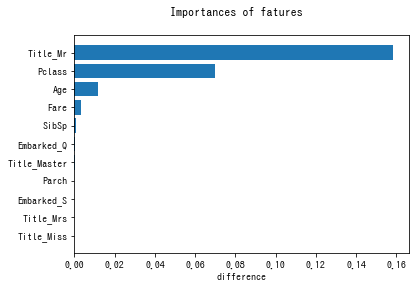

In [16]:
df_pfi = pd.DataFrame(
    data={"var_name": X_test.columns, "importance": pfi["importances_mean"]}
).sort_values("importance")

# describe impacts of Permutation Feature Importance
plot_bar(
    df_pfi["var_name"],
    df_pfi["importance"],
    xlabel="difference",
    title="Importances of fatures",
)

### 4. Conclusion
In this notebook, we looked through how the Permutation Feature Importance explains the model with using the data "Titanic" and we understand several points below.
- There is a danger in making causal relationships based on the importance of feature quantities. 
- If strongly correlated features are included in the model, there will be a conflict in importance. In this case, it is possible to deal with it by combining the features as a group, shuffling the values, and calculating the importance.

Refrence:機械学習を解釈する技術〜予測力と説明力を両立する実践テクニック